# Batch SnowRadar Processing Example
A simple workflow using multiple CPUs and landmask/QA filtering

In [23]:
# Community imports
import pandas as pd
from glob import glob

# pySnowRadar imports
from pySnowRadar import SnowRadar
from pySnowRadar.qc import error_check
from pySnowRadar.processing import geo_filter, batch_process
from pySnowRadar.algorithms import Wavelet_TN

In [24]:
# Gather SR filenames and filter to remove those over land
input_sr_data = glob('F:/Data/SR/20160419_04/*.mat')
geo_filtered = geo_filter(input_sr_data)

# Generate error codes for SR data
sr_data = [SnowRadar(sr, 'full') for sr in geo_filtered]
error_codes = [pd.Series(error_check(sr).tolist()) for sr in sr_data]

C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:35: RuntimeWarning: invalid value encountered in true_divide
  return 10*np.log10(sr.data_radar/noise)
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:35: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(sr.data_radar/noise)
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:58: RuntimeWarning: invalid value encountered in less
  snr_max < QC_MIN_SNR, # Check for valid SNR
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:35: RuntimeWarning: divide by zero encountered in true_divide
  return 10*np.log10(sr.data_radar/noise)
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:35: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(sr.data_radar/noise)


In [25]:
workers = 6
picker = Wavelet_TN

params={'snow_density':0.3,
        'ref_snow_layer': 1,
        'cwt_precision': 10}

res = batch_process(geo_filtered, picker, params, workers)

In [27]:
res

,src,picker,lat,lon,n_snow,b_as,b_si,snow_depth
0,Data_20160419_04_001.mat,Wavelet_TN,79.823541,-86.807846,1.238066,768.0,796.0,0.293459
1,Data_20160419_04_001.mat,Wavelet_TN,79.823585,-86.807841,1.238066,767.0,796.0,0.303940
2,Data_20160419_04_001.mat,Wavelet_TN,79.823628,-86.807836,1.238066,768.0,795.0,0.282978
3,Data_20160419_04_001.mat,Wavelet_TN,79.823671,-86.807831,1.238066,769.0,796.0,0.282978
4,Data_20160419_04_001.mat,Wavelet_TN,79.823714,-86.807826,1.238066,771.0,798.0,0.282978
5,Data_20160419_04_001.mat,Wavelet_TN,79.823757,-86.807821,1.238066,766.0,799.0,0.345863
6,Data_20160419_04_001.mat,Wavelet_TN,79.823800,-86.807816,1.238066,765.0,803.0,0.398266
7,Data_20160419_04_001.mat,Wavelet_TN,79.823843,-86.807811,1.238066,765.0,801.0,0.377305
8,Data_20160419_04_001.mat,Wavelet_TN,79.823887,-86.807806,1.238066,766.0,788.0,0.230575
9,Data_20160419_04_001.mat,Wavelet_TN,79.823930,-86.807802,1.238066,760.0,800.0,0.419227


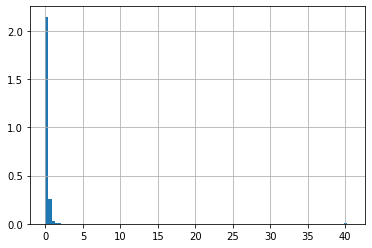

In [29]:
res.snow_depth.hist(density = True, bins = 100)

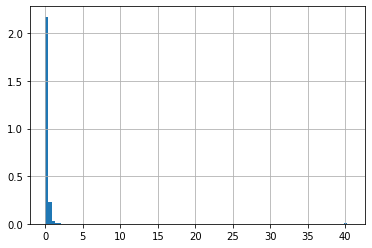

In [33]:
res.loc[res.snow_depth > 0].snow_depth.hist(density = True, bins = 100)